# "2020 February One Day Holding Long Short Portfolio BackTest"
> "2020 February Portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [25]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [26]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20204dayreturnpred2019train60K.csv')

In [27]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20200201].loc[df_testp.Date<20200301].sort_values(by='Date',ascending=True).copy()

**Long-Short Portfolio**

In [28]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200203,1.0,1.967229,1.000000
1,20200204,1.0,10.013888,1.019672
2,20200205,1.0,-6.003508,1.121781
3,20200206,-1.0,-2.212225,1.054435
4,20200206,1.0,-5.045972,1.031108
5,20200207,-1.0,1.136512,0.979079
6,20200207,1.0,14.493940,0.990206
7,20200210,1.0,-13.130297,1.133726
8,20200211,1.0,73.069531,0.984865
9,20200212,1.0,35.714059,1.704501


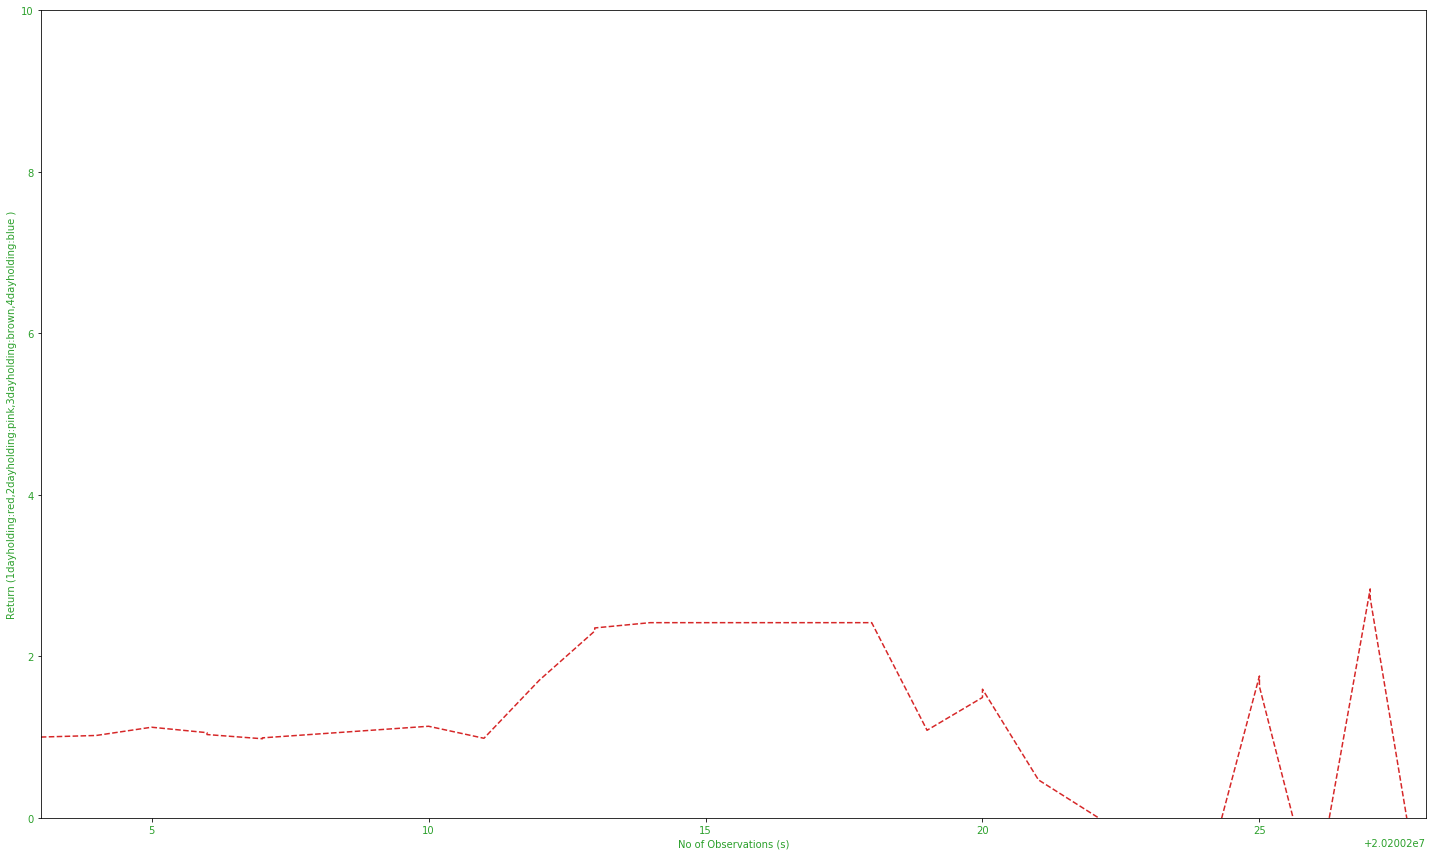

In [30]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Long portfolio**

In [31]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200203,1.0,1.967229,1.000000
1,20200204,1.0,10.013888,1.019672
2,20200205,1.0,-6.003508,1.121781
3,20200206,1.0,-5.045972,1.054435
4,20200207,1.0,14.493940,1.001228
5,20200210,1.0,-13.130297,1.146346
6,20200211,1.0,73.069531,0.995827
7,20200212,1.0,35.714059,1.723474
8,20200213,1.0,2.779882,2.338996
9,20200214,1.0,0.000000,2.404017


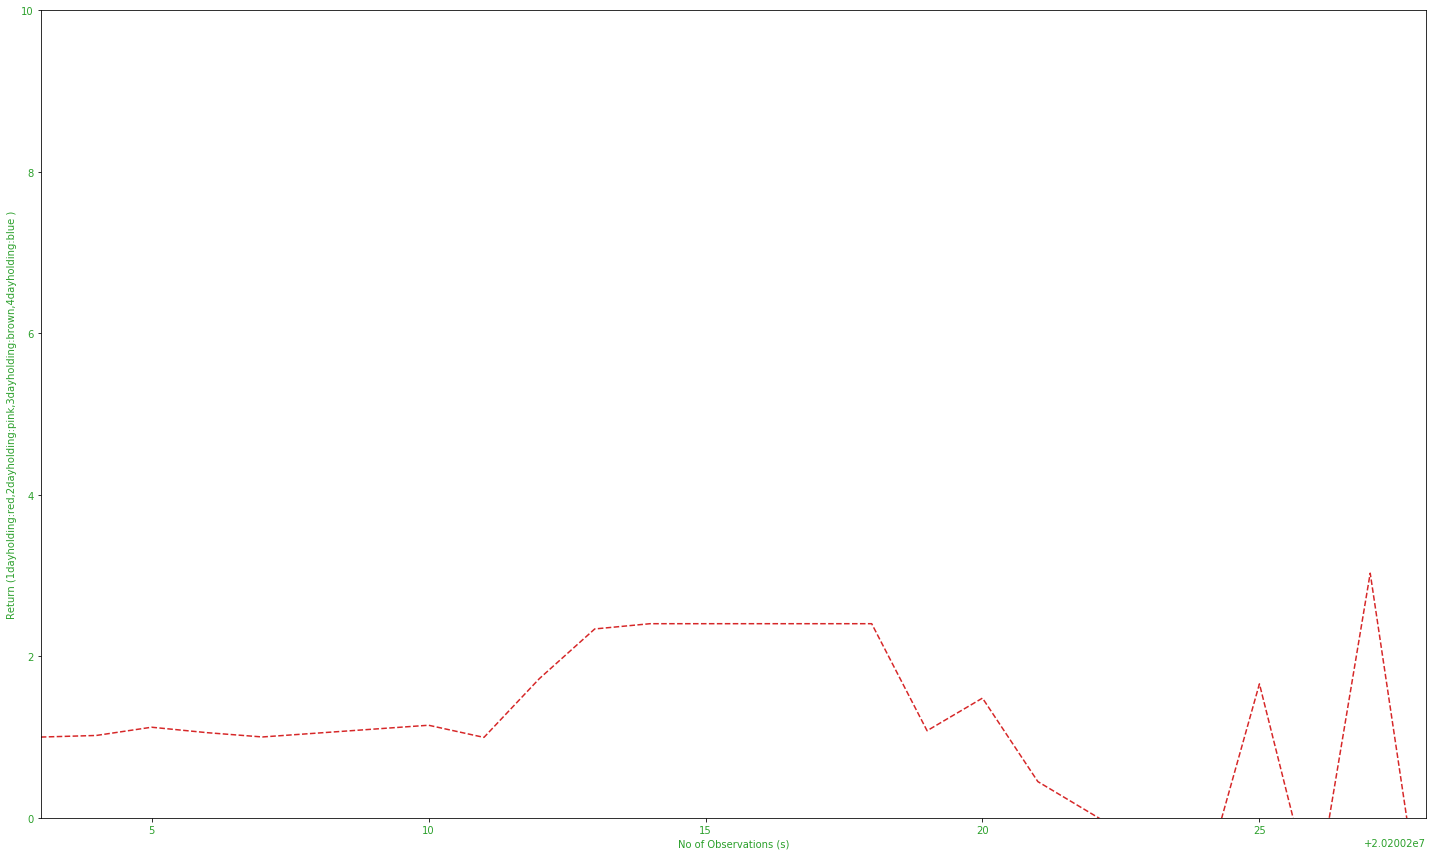

In [33]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Short Portfolio**

In [34]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==-1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200206,-1.0,-2.212225,1.000000
1,20200207,-1.0,1.136512,0.977878
2,20200213,-1.0,1.652893,0.988991
3,20200219,-1.0,0.014741,1.005338
4,20200220,-1.0,6.845238,1.005487
5,20200221,-1.0,-1.538462,1.074315
6,20200224,-1.0,0.075245,1.057787
7,20200225,-1.0,-7.434724,1.058583
8,20200226,-1.0,-4.514187,0.979880
9,20200227,-1.0,-4.024390,0.935646


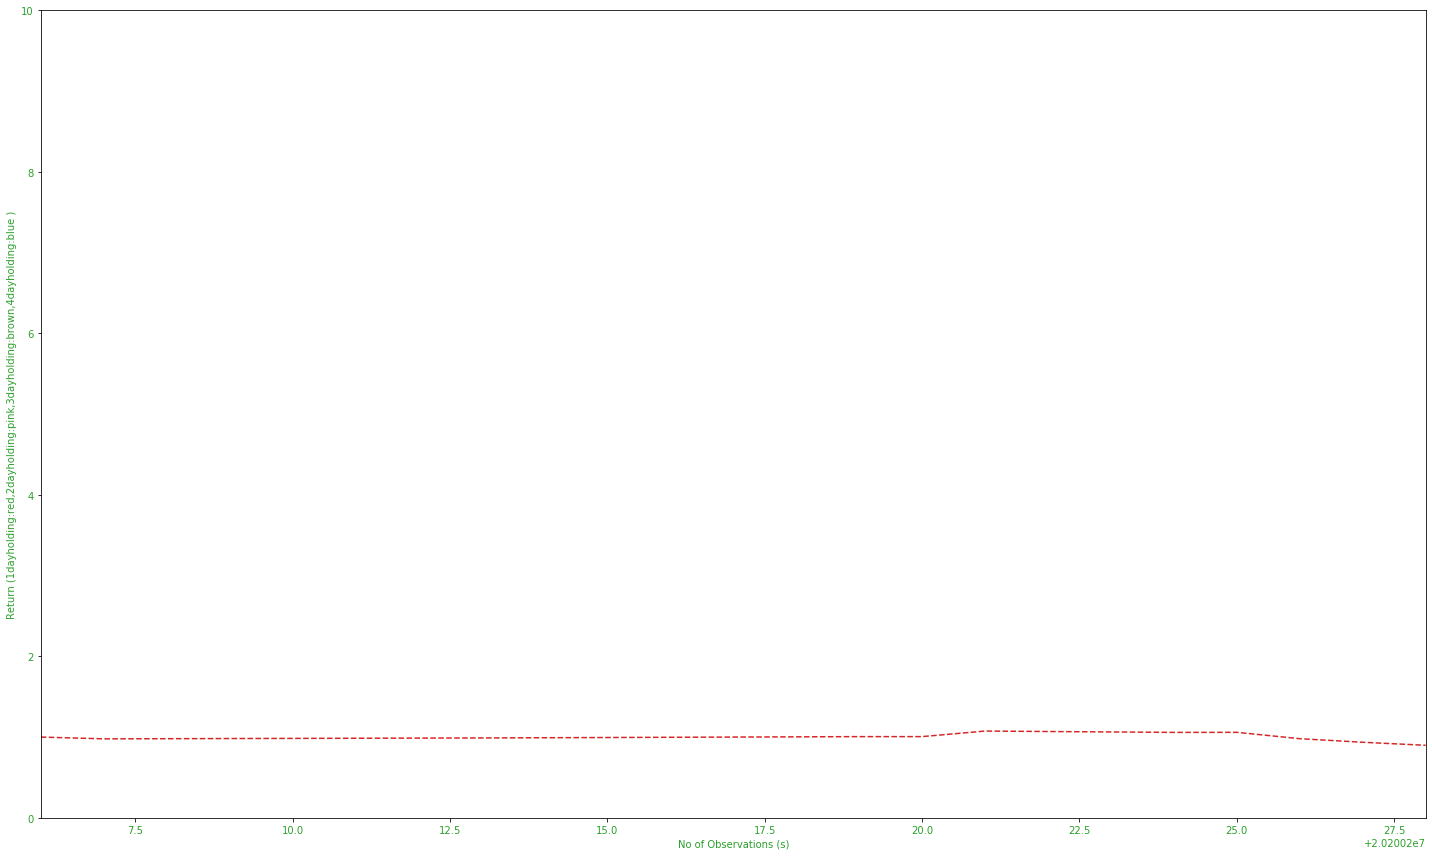

In [36]:
#hide
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()